In [21]:
# working with lienar regression
# importing the various necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets


In [22]:
# usind sklearn dataset, the housing dataset in particular
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [23]:
# create a dataframe
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

housing_df['HousePrice'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
# we will be predicting the price of a house based on the attribute available
# let us try to describe it
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [25]:
#  checking for any missing value
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

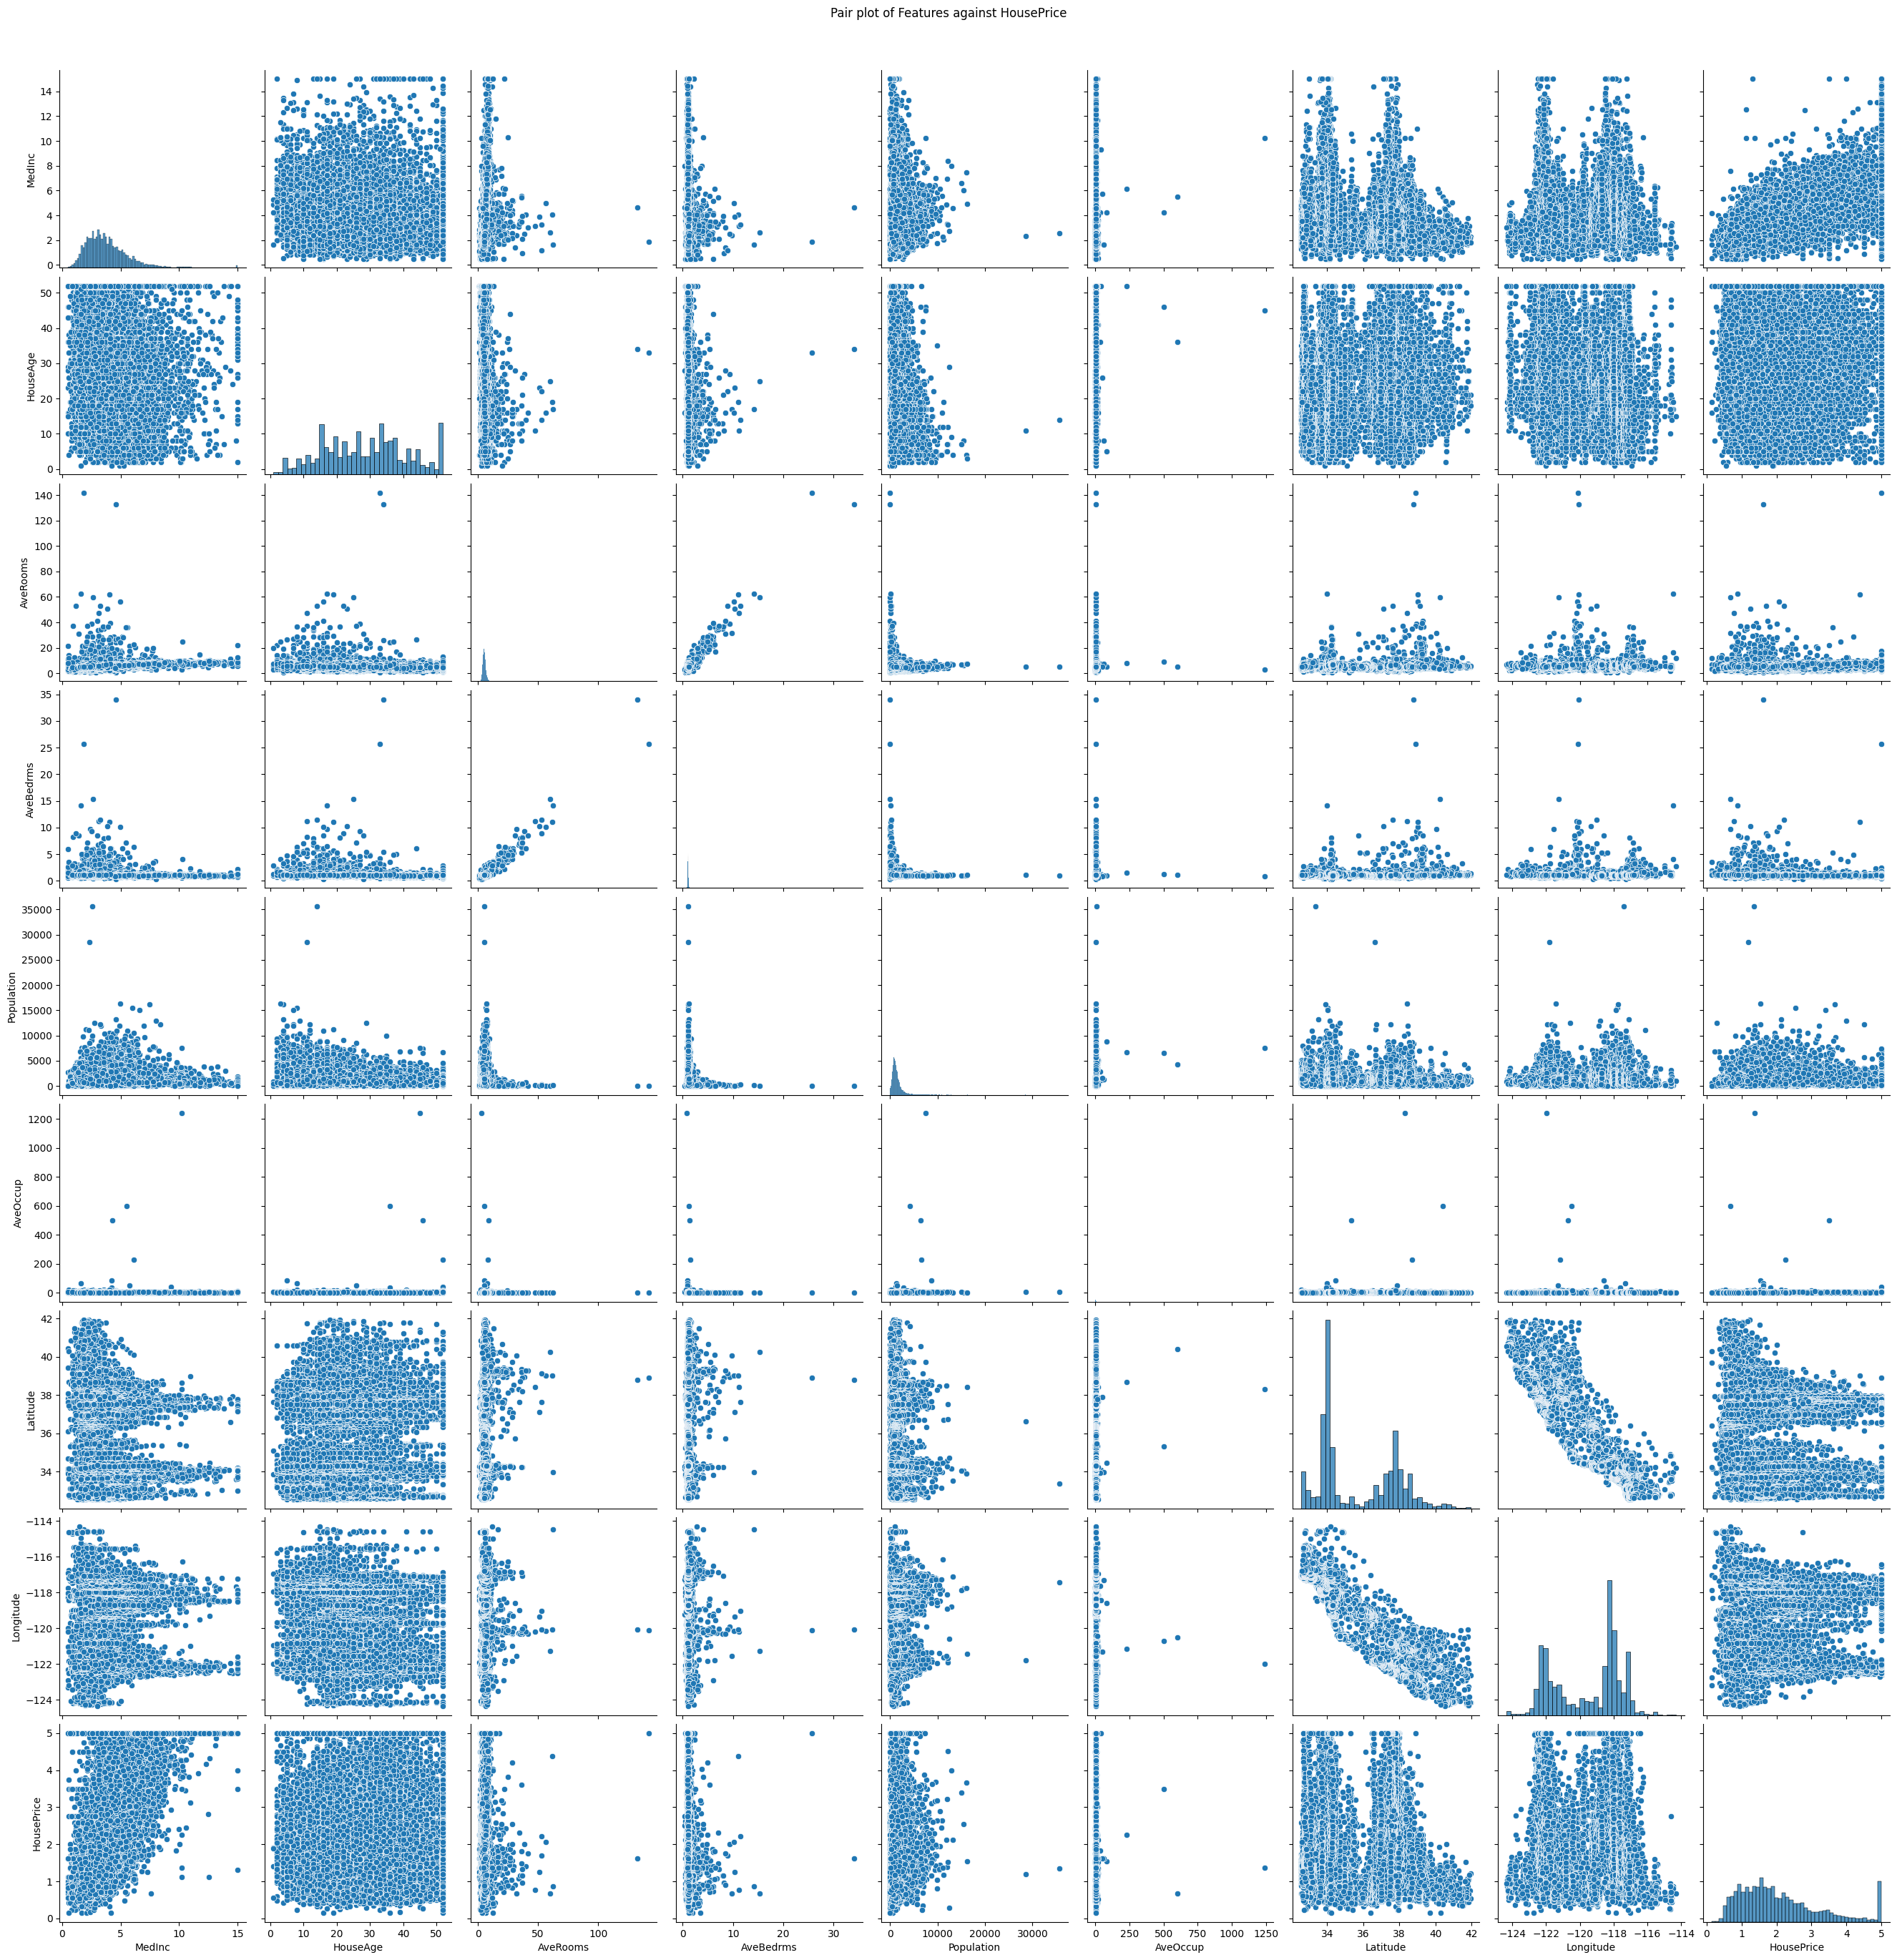

In [20]:
#  visualize pwise relationship in housing_df features against houwse price usinf the pairplot
sns.pairplot(housing_df, height=3)
plt.suptitle('Pair plot of Features against HousePrice', y = 1.02)
plt.show()

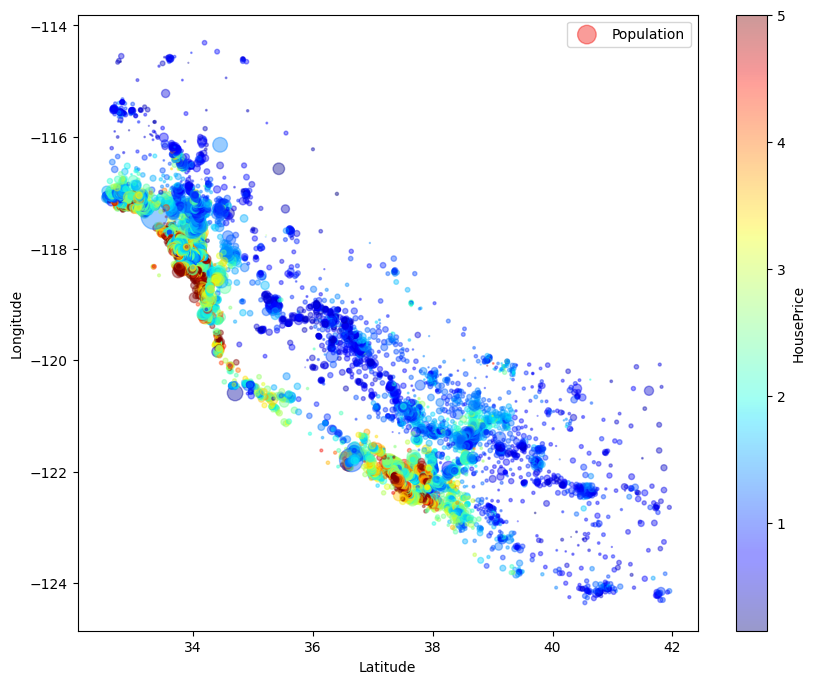

In [26]:
# plot the g graph distribution of datapoints based on longitude and latitude
# size of each point represents the population and color represents the house price
housing_df.plot(
    kind="scatter",
    x="Latitude",
    y="Longitude",
    alpha=0.4,
    s=housing_df['Population'] / 100,  # Accessing the 'population' column
    label="Population",
    c="HousePrice",
    cmap="jet",
    colorbar=True,
    figsize=(10, 8)
)
plt.show()
# print(housing_df.columns)
# print(housing_df.head())



<Axes: >

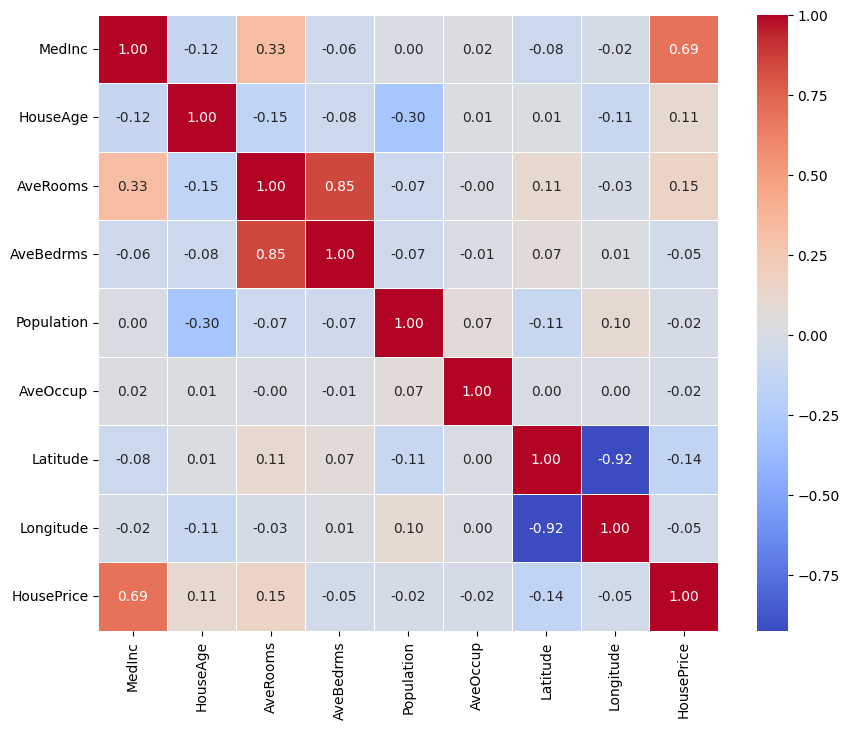

In [27]:
# Check for multi colinearity using the variance inflation factors(VIF) for each predictor
# compute the correlation between feature variables and visualize it using a heatmap
corr = housing_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


In [28]:
# compute and display the absolute correlation value of housePrice sorting them in descending order
corr['HousePrice'].abs().sort_values(ascending=False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

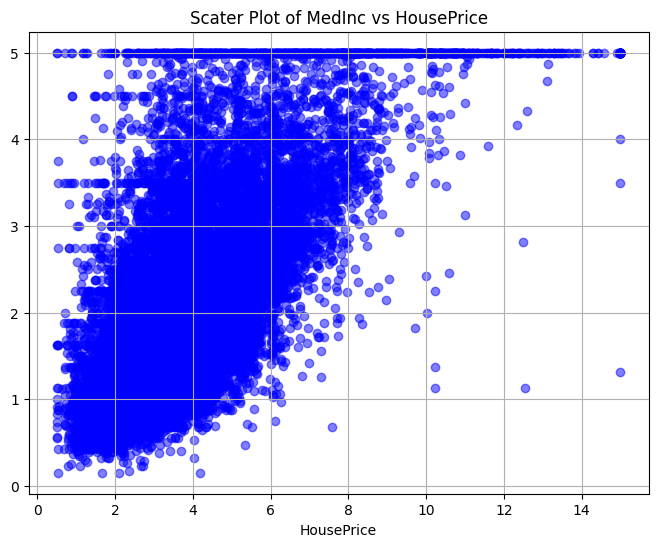

In [29]:
# plot the scatter plot to better understand the relationship medical insurance and housePrice
medinc = housing_df['MedInc']
houseprice = housing_df['HousePrice']

plt.figure(figsize=(8,6))
plt.scatter(medinc, houseprice, alpha=0.5, color='blue')
plt.title('Scater Plot of MedInc vs HousePrice')
plt.xlabel('MedInc')
plt.xlabel('HousePrice')
plt.grid(True)
plt.show()

In [30]:
# calculate the variance inflation factor VIF for each feature in the housing dataset to identify multi colinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif = housing_df.drop('HousePrice', axis = 1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric, errors='coerce')

vif_data = pd.DataFrame()
vif_data["Feature"] = housing_df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(housing_df_vif.values, i)
                   for i in range(len(housing_df_vif.columns))]
print(vif_data)

      Feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [31]:
# removing the longitude and latitude columns from the housing_df dataset to eliminate multi colinear features
housing_df = housing_df.drop(['Latitude', 'Longitude'], axis=1)

In [34]:
# convert selected column on the housing dataframe to numeric and aadd a constant to the features
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df[cols_to_convert] = housing_df[cols_to_convert].apply(pd.to_numeric, errors='coerce' )
housing_df['HousePrice'] = pd.to_numeric(housing_df['HousePrice'], errors='coerce')

x = sm.add_constant(housing_df.drop('HousePrice', axis=1))
y = housing_df['HousePrice']
model = sm.OLS(y,x).fit()

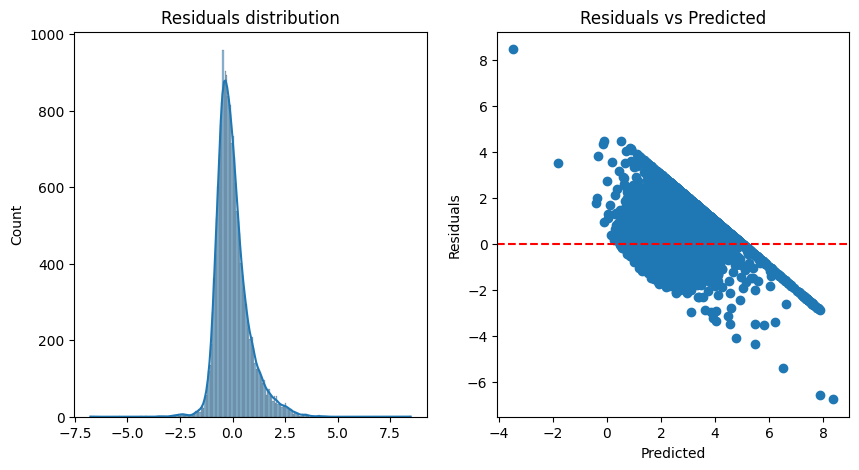

Model coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [36]:
# perform residual analysis to validate linear regression assumption and visualize the distribution of residuals
# and the relationship with predicted values.
residuals = model.resid
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals distribution')

plt.subplot(1, 2, 2)
plt.scatter(model.predict(x), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.show()

print("Model coefficients:\n", model.params)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(x)
print("R Square Score:", r2_score(y, predictions))
print("MSE", mean_squared_error(y, predictions))

R Square Score: 0.5396977345638282
MSE 0.6129156196698704


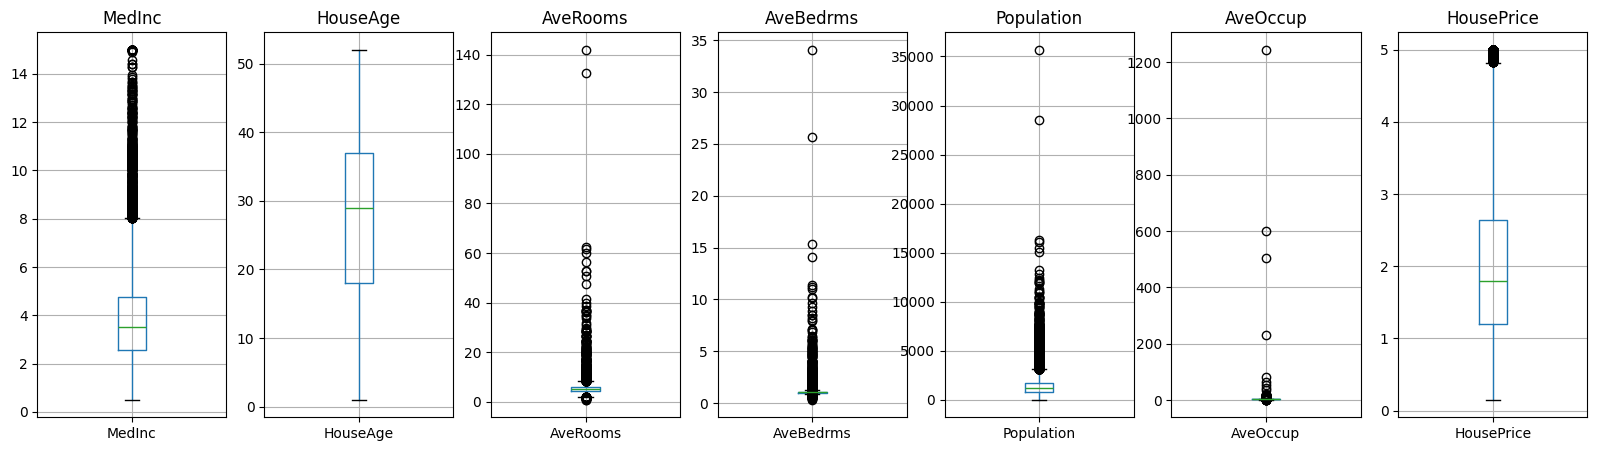

In [48]:
# visualize the distribution of several predictors and the target variables using box plot to identify potential outliers which my impact the model evaluation
import matplotlib.pyplot as plt
def plot_boxplots(df):
    fig, axes = plt.subplots(1, len(df.columns), figsize=(20, 5))
    for i, column_name in enumerate(df.columns):
        df.boxplot(column = column_name, ax = axes[i])
        axes[i].set_title(column_name)
    plt.show()
plot_boxplots(housing_df)        

In [49]:
# now let's create a function remove_outliers that iterates through each column to calculate the upper and lower bounds
# based on the intercordal range and replaces outliers with this bound.
# Function to remove outliers
def remove_outliers(df):
    df_no_outliers = df.copy()
    for column_name in df.columns:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_no_outliers[column_name] = df_no_outliers[column_name].apply(lambda x: 
            lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df_no_outliers

# Apply the function to remove outliers
housing_df_new = remove_outliers(housing_df)

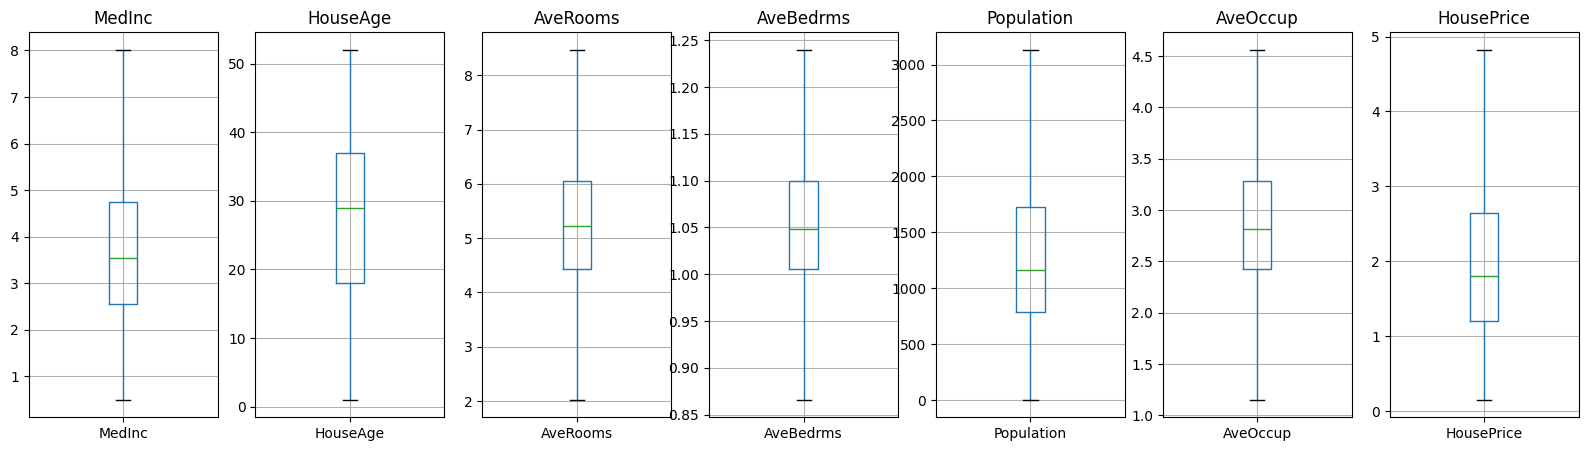

In [51]:
# now let us visualize the distribution of predictors and the target variable in the clean dataframe
# Visualize the distribution of predictors and the target variable in the clean dataframe
plot_boxplots(housing_df_new)

In [52]:
# feed the linear regression model on the clean dataframe.
# convert selected column on the housing dataframe to numeric and aadd a constant to the features
cols_to_convert = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
housing_df_new[cols_to_convert] = housing_df_new[cols_to_convert].apply(pd.to_numeric, errors='coerce' )
housing_df_new['HousePrice'] = pd.to_numeric(housing_df_new['HousePrice'], errors='coerce')

x = sm.add_constant(housing_df_new.drop('HousePrice', axis=1))
y = housing_df_new['HousePrice']
model = sm.OLS(y,x).fit()

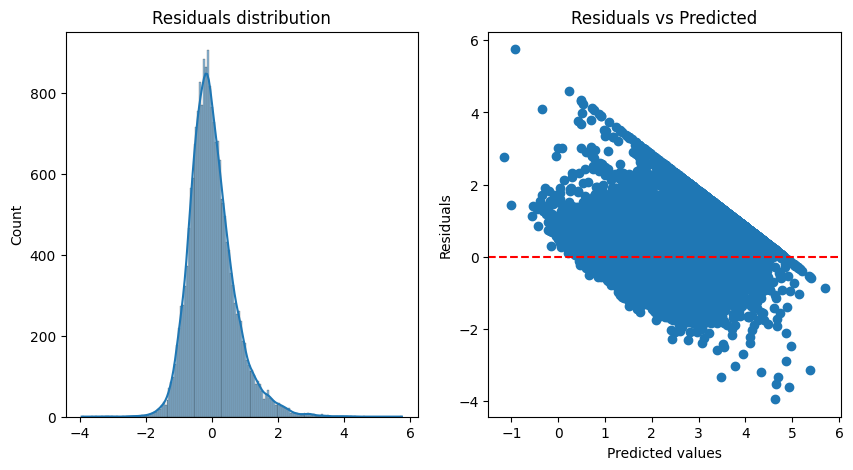

Model coefficients:
 const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


In [53]:
residuals = model.resid
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals distribution')

plt.subplot(1, 2, 2)
plt.scatter(model.predict(x), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.ylabel('Residuals')
plt.xlabel('Predicted values')
plt.show()

print("Model coefficients:\n", model.params)

In [54]:
# compute and interprete the Rsquare
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(x)
print("R Square Score:", r2_score(y, predictions))
print("MSE", mean_squared_error(y, predictions))

R Square Score: 0.617696810976802
MSE 0.49001892235770017


In [1]:
# logistic regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import dataset
df = pd.read_csv('cuisines.csv')

In [3]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
# predict which cuisines it belongs to
# check the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<Axes: ylabel='cuisine'>

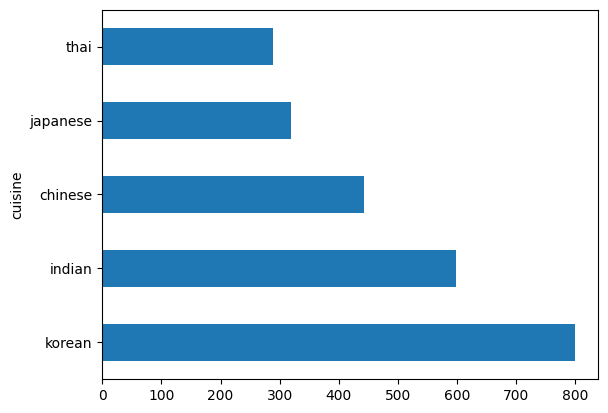

In [5]:
# plot to better visualize
df.cuisine.value_counts().plot.barh()

In [6]:
thai_df = df[(df.cuisine == 'thai')]
japanese_df = df[(df.cuisine == 'japanese')]
chinese_df = df[(df.cuisine == 'chinese')]
indian_df = df[(df.cuisine == 'indian')]
korean_df = df[(df.cuisine == 'korean')]

In [7]:
print(f'thai df : {thai_df.shape}')
print(f'japanese df : {japanese_df.shape}')
print(f'chinese df : {chinese_df.shape}')
print(f'indian df : {indian_df.shape}')
print(f'korean df : {korean_df.shape}')


thai df : (289, 385)
japanese df : (320, 385)
chinese df : (442, 385)
indian df : (598, 385)
korean df : (799, 385)


In [8]:
# Create a function create_ingredients, so that for each cuisine we know how many
# ingredients have been used.
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine', 'Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df

<Axes: >

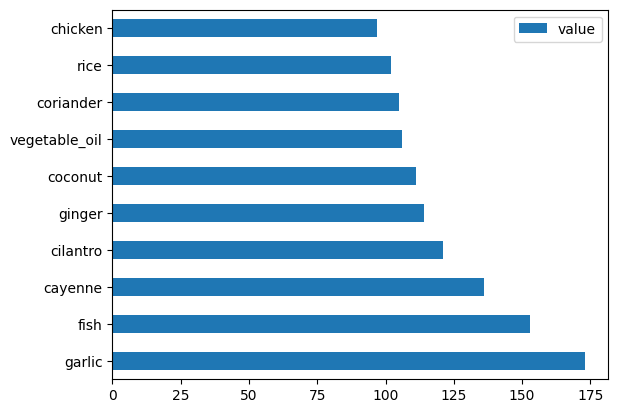

In [9]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()


<Axes: >

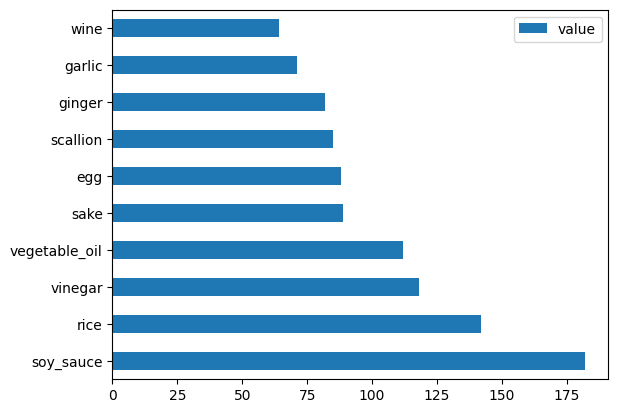

In [10]:
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

<Axes: >

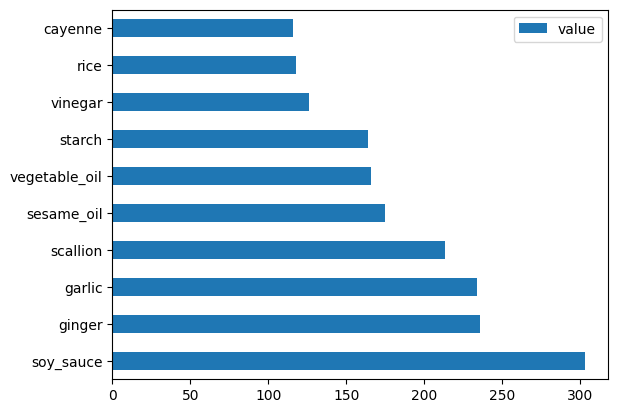

In [11]:
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

<Axes: >

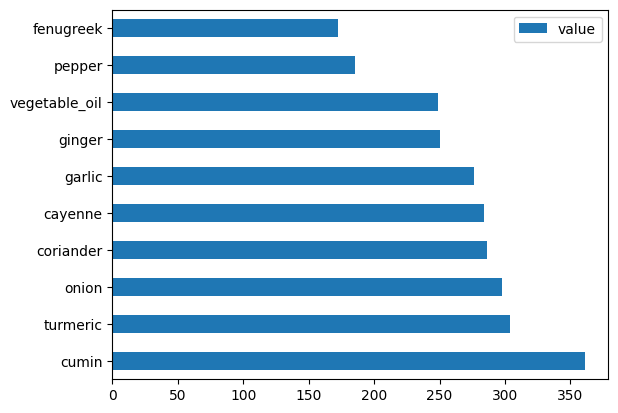

In [12]:
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

<Axes: >

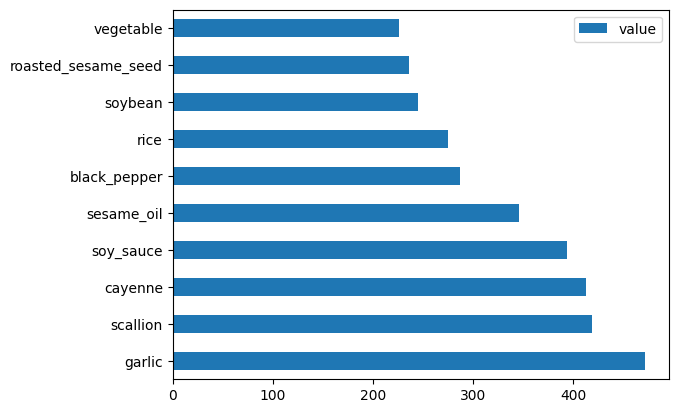

In [13]:
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

In [14]:
# since there are common ingredients used, we can create a feature and drop so that it does not influence our model
feature_df = df.drop(['cuisine', 'Unnamed: 0', 'rice', 'garlic', 'ginger'], axis=1)
lables_df = df.cuisine
# check the features
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# we should balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, lables_df)

In [16]:
print(f'new label count : {transformed_label_df.value_counts()}')
print(f'old label count : {lables_df.value_counts()}')

new label count : cuisine
indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: count, dtype: int64
old label count : cuisine
korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: count, dtype: int64


In [17]:
# let's fit the logistic regression model
# importing the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

In [18]:
x_train, x_test, y_train, y_test = train_test_split(transformed_feature_df, transformed_label_df, test_size=0.3)

In [25]:
# let's fit the logistic regression
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
model = lr.fit(x_train, np.ravel(y_train))
# calculate the accuracy
accuracy = model.score(x_test, y_test)
print("Accuracy is {}".format(accuracy))


Accuracy is 0.7898248540450375


In [24]:
# probability of each of the ingrdients
print(f'ingredients: {x_test.iloc[50][x_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['buckwheat', 'citrus', 'katsuobushi', 'pea', 'sake', 'scallion',
       'seaweed', 'sesame_oil', 'shiitake', 'soy_sauce', 'soybean', 'vinegar',
       'wine'],
      dtype='object')
cuisine: japanese


In [26]:
test = x_test.iloc[50].values.reshape(-1,1).T
probs = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=probs, columns=classes)

toppred = resultdf.T.sort_values(by=[0], ascending=[False])
toppred.head()

c:\Users\DELIGHT\Desktop\ml_algo\myvenvi\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
japanese,0.981714
korean,0.016053
chinese,0.002230
indian,0.000002
thai,0.000002


In [27]:
# check the classification report
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     chinese       0.75      0.67      0.71       254
      indian       0.89      0.86      0.87       237
    japanese       0.71      0.79      0.75       220
      korean       0.82      0.80      0.81       255
        thai       0.78      0.85      0.81       233

    accuracy                           0.79      1199
   macro avg       0.79      0.79      0.79      1199
weighted avg       0.79      0.79      0.79      1199



MSE: 3.3070457587469693


<Axes: xlabel='SalePrice', ylabel='Count'>

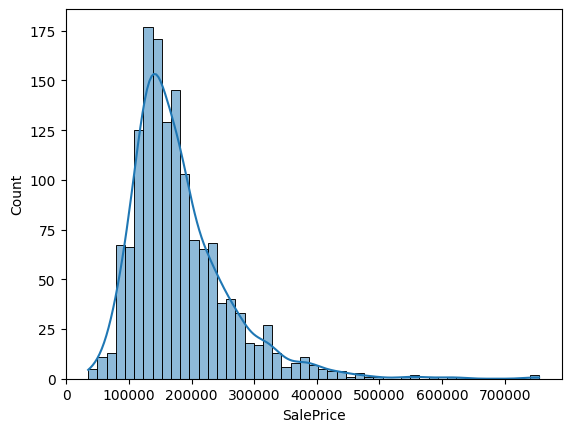

In [12]:
# regression model implementation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class LinearRegression:
    def __init__(self, learning_rate=0.01, iters=1000):
        self.lr = learning_rate
        self.iters = iters
        self.weights = None
        
    def fit(self, X, y):
        '''
        Used to calculate the weights matrix of the linear regression model.
        
        :param X: array, features
        :param y: array, known labels
        :return: None
        '''
        n_samples = len(X)
        # modify X, add 1 column with value 1
        ones = np.ones(len(X))
        features = np.c_[ones, X]
        # initialize the weights matrix
        self.weights = np.zeros(features.shape[1])
        for _ in range(self.iters):
            # predicted labels
            y_predicted = np.dot(features, self.weights.T)
            # calculate the error
            error = y_predicted - y
            # compute the partial derivative of the cost function
            dw = (2 / n_samples) * np.dot(features.T, error)
            # update the weights matrix
            self.weights -= self.lr * dw
            
    def predict(self, X):
        '''
        Makes predictions
        
        :param X: array, features
        :return: array, predictions
        '''
        # modify the features X by adding one column with value equal to 1
        ones = np.ones(len(X))
        features = np.c_[ones, X]
        # predict the labels matrix
        y_predicted = np.dot(features, self.weights.T)
        return y_predicted

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Example usage
X = np.array([1., 2., 3., 4., 5., 6., 7., 8., 9.])
y = np.array([40, 43, 55, 60, 68, 77, 82, 86, 94])

# Define and train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate mean squared error
mse = mean_squared_error(y, predictions)
print("MSE:", mse)

# Visualize the target variable distribution
df = pd.read_csv('House_Price.csv', sep=',')
df['SalePrice'].describe()
sns.histplot(df['SalePrice'], kde=True)


In [13]:
missing_value_columns = df.isna().sum()
missing_value_columns = missing_value_columns[missing_value_columns!=0]
missing_value_columns.sort_values(ascending=False)
print('Columns with missing values:', len(missing_value_columns))


Columns with missing values: 19


In [14]:
df_reg=df[['OverallQual', 'GrLivArea','GarageArea', 'SalePrice']]
df_reg.corr()


,OverallQual,GrLivArea,GarageArea,SalePrice
OverallQual,1.000000,0.593007,0.562022,0.790982
GrLivArea,0.593007,1.000000,0.468997,0.708624
GarageArea,0.562022,0.468997,1.000000,0.623431
SalePrice,0.790982,0.708624,0.623431,1.000000


In [15]:
X_train=df_reg[['OverallQual', 'GrLivArea','GarageArea']]
X_train=(X_train-X_train.mean())/X_train.std()
y_train=df_reg['SalePrice']


In [17]:
from sklearn.linear_model import SGDRegressor

# Create a linear regression model with stochastic gradient descent
c = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=2000)

# Fit the model to the training data
c.fit(X_train, y_train)


SGDRegressor(learning_rate='constant', max_iter=2000)